# Apprentissage non-supervisé 

Les différents modèles que nous avons créés jusque là ont permis de catégoriser un texte comme positif ou négatif, ou bien d'identifier la variété d'une fleur en se basant sur différents critères. Ces différents projets ont en commun qu'ils correspondent à des problèmes de classification, et font donc partie de ce que l'on appelle l'apprentissage supervisé. Pour rappel, on parle d'apprentissage supervisé lorsque nos données d'entraînement sont annotées. Ces annotations permettent de contrôler la qualité de l'entraînement d'un modèle, en comparant le résultat prédis au véritable résultat attendu. 

Cependant, obtenir des données annotées pour entraîner un modèle n'est pas une chose si évidente: en effet, à moins d'accéder à un dataset comme ``amazon-reviews``, il vous faudra la plupart du temps collecter les données par vous-même. Or, ces données seront généralement sous forme brute, sans annotation. Annoter soi-même son propre corpus ou le faire faire par une équipe d'annotateur est une tâche à la fois laborieuse et coûteuse. Si en général il est admis que les performances et la vitesse de production des algorithmes de Machine Learning sont largement supérieurs aux modèles symboliques à base de règles, il ne faut pas oublier que cet avantage n'est possible que si l'on a déjà des données annotées.

Une solution au problème d'annotation est de faire appel à des méthodes non-supervisées, en particulier le ``clustering`` et le ``topic modelling``. Contrairement aux méthodes supervisées, celles-ci n'ont besoin que des données d'entrée et n'ont pas besoin d'annotation. De manière générale, ces algorithmes constituent des groupes à partir des données, en identifiant leurs points communs. Ainsi, bien que cela ne remplace pas une annotation faite par expert, les méthodes non-supervisées permettent d'annoter rapidement un jeu de données, en plus d'en offrir une nouvelle compréhension.

A nouveau, nous allons utiliser le amazon-reviews dataset, mais cette fois nous n'utiliserons que la colonne contenant les avis des utilisateurs:

In [1]:
import pandas as pd

df_train = pd.read_csv('data/multiclass/as_train.csv')
df_dev = pd.read_csv('data/multiclass/as_dev.csv')
df_test = pd.read_csv('data/multiclass/as_test.csv')

In [2]:
df_train

,texts,classes
0,A déconseiller - Article n'a fonctionné qu'une...,0
1,Si vous voulez être déçu achetez le produit ! ...,0
2,"Écran de mauvaise qualité, car il s'use en peu...",0
3,Cet engin ne sert à rien les sons sont pourris...,0
4,Très beau produit mais la grue n'a pas fonctio...,0
...,...,...
199995,Très jolies boucles! Très belle qualité ! Elle...,1
199996,Superbe. Ultra rapide. Tres bel écran. Il y a ...,1
199997,facile d'utilisation mais un peu lourd,1
199998,livré vite et bon produit,1


## Clustering

Le ``Clustering`` est un problème appartenant aux méthodes non-supervisées. Avant même de permettre d'annoter des données textuelles, il est avant tout utile pour comprendre les relations sous-jacentes aux données et en donner un nouvel aperçu. Il existe plusieurs méthodes de clustering, qui ont toutes en commun le même objectif: diviser les données en un certain nombre de groupes. Ces données sont groupées selon leur similarité, qui peut être calculée grâce à différentes méthodes comme la distance Euclidienne (distance entre deux points) ou la distance cosine. Une fois entraîné, le modèle peut associer un nouveau point de donnée à l'un de ses clusters.


Il existe de nombreux algorithmes de clustering, mais un des plus communs et efficaces est le ``K-Means Clustering``.

## Calculer la similarité

### Distance Euclidienne

### Similarité cosinus

### Jaccard

### K-means clustering


K-Means consiste à sélectionner au hasard K points de données. Le nombre K correspond au nombre de cluster que l'on souhaite obtenir. Ces points seront utilisés comme centre pour constituer les groupes, et sont appelés ``centroïdes``. L'algorithme déplace chaque centroïdes jusqu'à ce qu'il arrive à associer de manière optimale chaque groupe de données à un centroïde.

L'avantage majeur de cette méthode est qu'il très rapide et s'adapte bien à de grands datasets. A l'inverse, le choix de K se fait toujours de manière empirique, et peut demander plusieurs essais avant d'obtenir un résultat correct. Il est donc difficile de reproduire les résultats.

<img src='img/kmeans.gif'>

Avant toutes choses, il nous faut d'abord vectoriser nos données textuelles. Nous allons réutiliser les mêmes étapes de prétraitement que précédemment, et utiliser la méthodes TF-IDF. Nous allons également transformer tout le texte en minuscule et supprimer les mots vides:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

with open('data/fr_stopwords.txt') as f:
    stopwords = [line.strip() for line in f]
    
data = df_train['texts']

In [3]:
data

0         A déconseiller - Article n'a fonctionné qu'une...
1         Si vous voulez être déçu achetez le produit ! ...
2         Écran de mauvaise qualité, car il s'use en peu...
3         Cet engin ne sert à rien les sons sont pourris...
4         Très beau produit mais la grue n'a pas fonctio...
                                ...                        
199995    Très jolies boucles! Très belle qualité ! Elle...
199996    Superbe. Ultra rapide. Tres bel écran. Il y a ...
199997               facile d'utilisation mais un peu lourd
199998                            livré vite et bon produit
199999    Parfait La Réception du coli avant l’heure Pro...
Name: texts, Length: 200000, dtype: object

In [4]:
tfidf = TfidfVectorizer(stop_words=stopwords,
                        max_features=10000)
X = tfidf.fit_transform(data)
X.shape

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  warnings.warn(


(200000, 10000)

Scikit-learn propose différentes implémentations de K-Means Clustering, la principale étant nommée ``K-means``. Cependant, nous allons plutôt utiliser la classe ``MiniBatchKMeans``, qui est plus adaptée aux grand nombre de features. Cet algorithme traite les données par paquets ("batch") plutôt que dans son ensemble, ce qui augmente la vitesse de traitement, mais baisse les performances de manière très légères.

In [5]:
from sklearn.cluster import MiniBatchKMeans

mbkm = MiniBatchKMeans(n_clusters=20) # n_clusters indique le nombre de cluster
                                        # dans lesquels on regroupe les données
    
# on voit que les algorithmes de clustering sont des transformers dans scikit-learn
centers = mbkm.fit_transform(X)
centroids = mbkm.cluster_centers_

In [6]:
centers

array([[1.01862904, 1.01734966, 1.02541143, ..., 1.03449312, 1.02178855,
        1.00652237],
       [0.96859014, 0.97054155, 1.01603822, ..., 0.97484757, 1.01693973,
        1.00391034],
       [1.02095692, 1.0223593 , 1.02669085, ..., 1.03843207, 0.98644307,
        1.00665989],
       ...,
       [0.89863945, 1.02898169, 1.02158115, ..., 1.0403339 , 1.02071542,
        1.01099332],
       [1.01625808, 1.01633073, 1.02326963, ..., 1.03252433, 1.01838427,
        1.00343308],
       [1.01600524, 1.01705013, 1.02182215, ..., 1.0354571 , 1.0140477 ,
        1.00440526]])

In [7]:
centers.shape

(200000, 20)

In [9]:
centroids.shape

(20, 10000)

In [8]:
centroids

array([[7.46692084e-05, 2.00671395e-04, 0.00000000e+00, ...,
        1.74843882e-04, 5.13431839e-05, 4.00381091e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.28085589e-04, 5.30300584e-05, 0.00000000e+00],
       [0.00000000e+00, 2.21291692e-04, 0.00000000e+00, ...,
        2.63750056e-04, 6.98963471e-05, 2.40509252e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 6.22115421e-05, ...,
        7.97546790e-05, 7.50711387e-05, 2.76389261e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.99307317e-04],
       [0.00000000e+00, 8.18272096e-05, 0.00000000e+00, ...,
        0.00000000e+00, 1.26502027e-04, 3.42415631e-05]])

In [10]:
# on tente de predire a quel cluster un nouveau document appartient
first_doc = df_dev['texts'].iloc[0]
print("First doc :\n", first_doc)
vec_first_doc = tfidf.transform([first_doc])
pred = mbkm.predict(vec_first_doc)
print("First doc appartient au cluster :", pred[0])

First doc :
 Colis bien reçus avec le boîtier du jeu ouvert, cassé et sans le cd. Précommandé pour recevoir ça le jour de la sortie sa fait plaisir... Et le service client Amazon qui cherche à mettre la faute sur le livreur qui a très bien fait sont travail en livrant un colis en excellant état... Cela mériterait même un 0!
First doc appartient au cluster : 3


Ci-dessus, on peut voir que notre nouveau document est attribué au cluster 0. Les clusters créés par les algorithmes de clustering sont identifiés par leur identifiant: il n'ont donc pas de nom réel. Ainsi, il est impossible de vérifier si ce nouveau document devrait effectivement être attribué à ce cluster là.

## Evaluer et visualiser les groupes

Le fait de ne pas avoir de données annotées apporte une difficulté pour évaluer la qualité du modèle: en effet, sans classes pour comparer la prédiction d'un modèle, on ne peut pas savoir si un modèle de clustering a correctement groupé les données entre-elles. Ainsi, une des meilleurs façons d'évaluer un modèle de clustering est d'intervenir manuellement et d'observer soi-même ou à l'aide d'un expert les différents clusters. 

Une autre solution pouvant assister dans l'évaluation d'un modèle de clustering est de visualiser les clusters. Cela permet de voir rapidement si les documents, termes, ... similaires sont effectivement groupés ensemble et de comparer éventuellement avec d'autres données.

### Réduire le nombre de dimensions

Les données que nous avons ont plusieurs dizaines de millier de dimensions. Tel quel, on ne peut pas visualiser autant de dimensions: il nous faut donc une méthode pour réduire le nombre de dimensions à 2 ou 3, sans perde l'information que les vecteurs contiennent.

Il existe pour cela plusieurs algorithmes, les deux plus communs étant ``t-SNE`` et ``PCA``. Les transformations obtenues par t-SNE sont généralement meilleures, cependant c'est un algorithme très gourmand qui s'adapte mal à un grand nombre de dimensions, au contraire de PCA. Il est donc recommandé d'utiliser PCA pour une visualisation rapide des données, ou de réduire le nombre de dimensions avec PCA (à environ 50) puis d'utiliser t-SNE.

### Distribution des données

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) # on indique le nombre de dimensions que l'on veut garder
X_2d = svd.fit_transform(X) # on transforme les données

In [12]:
X.shape, X_2d.shape

((200000, 10000), (200000, 2))

<AxesSubplot:xlabel='x', ylabel='y'>

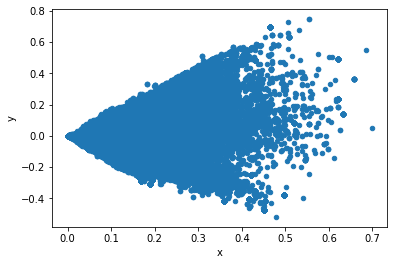

In [13]:
# visualisation avec pandas
df_X2d = pd.DataFrame(X_2d, columns=['x', 'y'])
labels = mbkm.labels_ # on utilise le cluster de chaque document comme index
df_X2d.index = labels

df_X2d.plot.scatter(x='x', y='y')

In [14]:
from matplotlib import cm
from matplotlib.colors import rgb2hex

# on veut visualiser a quel cluster chaque point appartient
# on doit donc associer chaque cluster (0, 1, 2, ...)
# a une couleur. On créé donc le mapping colormap pour lequel
# un clé est un cluster et une valeur une couleur au format
# hexadecimal

tab = cm.tab20
colormap = {i : rgb2hex(color) for i, color in enumerate(tab.colors)}


### Repartition des données et clusters

<AxesSubplot:xlabel='x', ylabel='y'>

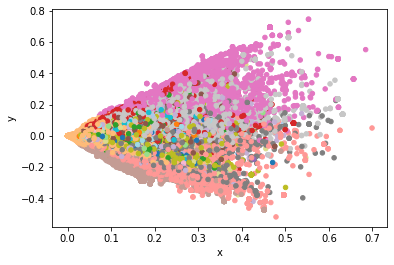

In [15]:
# on cree une colonne couleur dans laquelle chaque ligne est associe a une couleur
# par rapport a son index / son cluster
df_X2d['colors'] = [colormap[x] for x in df_X2d.index]
df_X2d.plot.scatter(x='x', y='y', c='colors')

### Répartition des données par cluster

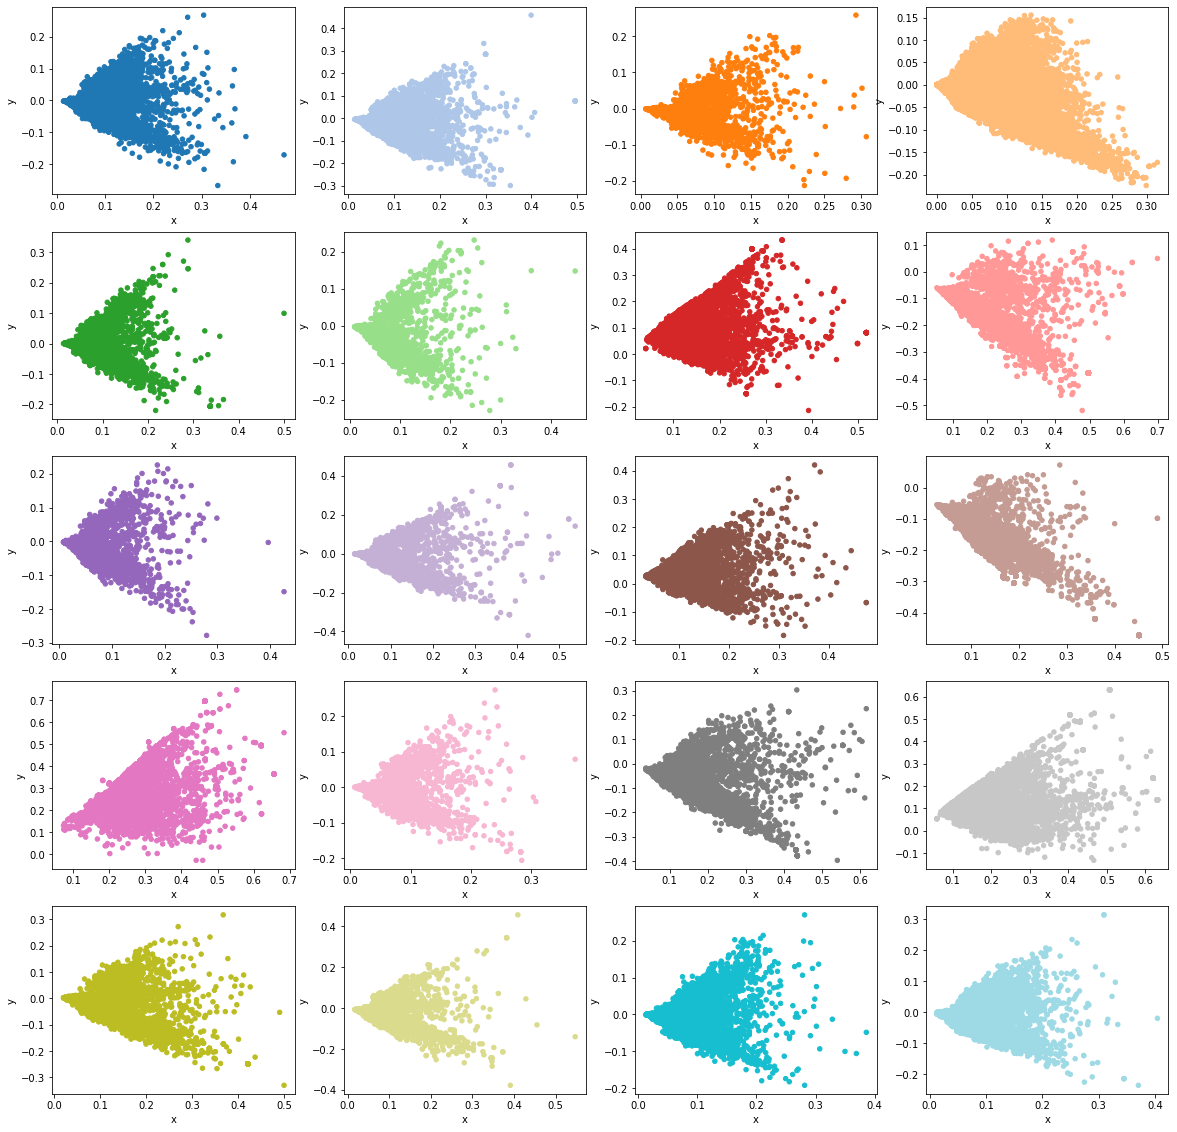

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20)) # on fait un graphique de 5 par 4
for i, ax in enumerate(axes.reshape(-1)):
    cluster = df_X2d.loc[i]
    # on a eu un petit soucis avec les donnéés: certain cluster
    # n'ont qu'un seul point. On a donc des Series, avec lesquels
    # on ne peut pas faire de graphiques. On doit donc les
    # convertir en DataFrame
    
    if isinstance(cluster, pd.Series):
        dict_data = {"x" : cluster['x'],
                    "y" : cluster['y'],
                    'colors' : cluster['colors']}
        dataplot = pd.DataFrame(dict_data, index=[i])
    else:
        dataplot = cluster
    dataplot.plot.scatter(x='x', y='y', c='colors', ax = ax)

### Visualisation des centroïdes des clusters

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_component indique le nombre de dimensions que l'on souhaite garder
centroids_2d = pca.fit_transform(centroids)

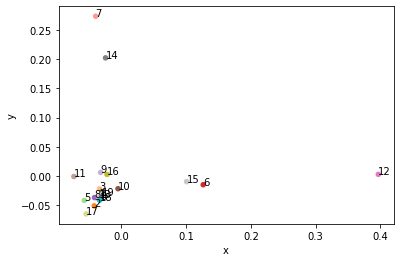

In [21]:
fig, ax = plt.subplots()

df_centroids = pd.DataFrame(centroids_2d, columns=['x', 'y'],
                           index =  list(set(mbkm.labels_)))
colors = [colormap[x] for x in df_centroids.index]
df_centroids.plot.scatter(x='x', y='y', ax=ax, c=colors)

for k, v in df_centroids.iterrows():
    ax.annotate(k, v)

### Voir les documents les plus représentatifs d'un cluster

In [16]:
cluster_doc = pd.DataFrame(data)
cluster_doc['clusters'] = labels
# l'id de chaque cluster devient l'index du DataFrame
cluster_doc.set_index('clusters', drop=True, inplace=True)
# pour chaque cluster, on print les documents associés
for i in range(20):
    print(f"Cluster {i}:\n")
    filter_doc = cluster_doc.loc[i]
    print(filter_doc['texts'].iloc[:10].values)
    print("\n*****\n")
    

Cluster 0:

["Cet engin ne sert à rien les sons sont pourris les songs sont simplistes vous n'apprendrez jamais à jouer de la batterie avec une bouze pareille. En fait c'est juste un jouet destiné aux enfants et rien d'autre. Si vous voulez vraiment quelque chose de bien et d'utile passez votre chemin et gardez votre fric moi j'ai voulu essayer et j'ai été très mais alors très déçu. Résultat direction poubelle."
 "C'est nul vau lieu un ventillateur pour le même prix ,je trouve cette appareils inutile ,reçus hier renvoyer hier ,regrette la pub de cette appareil"
 'Commande jamais reçue, 3 relances dans le vent...'
 'Je ne sais pas si je suis mal tomber mais pour ma part même diluer à 30% dans du 70/30 il reste très pauvre en goût , comme un chewing-gum trop longtemps mâché ... ce liquide reste relativement cher pour sa teneur en goût Si vous souhaitez faire une fiole de 100 ml de vap pour ma part ce concentré de 30 ml ne fait même pas l’affaire ... assez déçu de mon achat je ne le renou

AttributeError: 'str' object has no attribute 'iloc'

### Trouver le nombre optimal de clusters.

La méthode Elbow, qui permet de repérer le nombre de cluster idéal par rapport au dataset. On calcule l'inertie de chaque cluster (c'est à dire la somme au carré de la distance qui sépare chaque points de son centroïde), que l'on visualise ensuite par un graphique. Le nombre de cluster idéal est alors représenté par l'endroit qui ressemble à un coude (d'où le nom de méthode Elbow)

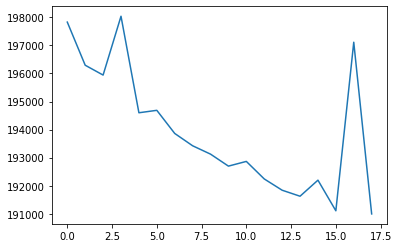

In [19]:
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

def elbow_method(data, min_k, max_k):
    """
    Implementation de la methode Elbow
    """
    k_range = range(min_k, max_k)
    sse = []
    for k in k_range:
        model = MiniBatchKMeans(n_clusters=k)
        model.fit(data)
        sse.append(model.inertia_)
    sse = pd.Series(sse)
    sse.plot()
elbow_method(X, 2, 20)

Cependant, notre implémentation est relativement lente. Nous pouvons donc utiliser l'outil ``Yellowbrick``, qui proposent différents outils de visualisations, dont la méthode Elbow, sous le nom de ``KElbowVisualizer``:

In [20]:
!pip3 install yellowbrick

  Using cached numpy-1.19.5-cp39-cp39-macosx_10_9_x86_64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.


Ci-dessous, la ligne pointillée indique le nombre idéal de cluster:

/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/nicolasgutehrle/opt/anaconda3/envs/cours/lib/python3.9/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/d

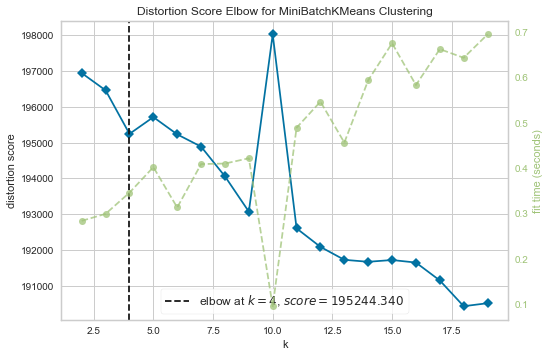

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

model = MiniBatchKMeans() # on initialise le modele que l'on va utiliser
# on instantie le visualisateur avec le model et le nombre k de cluster
# minimum et maximum que l'on veut essayer
visualizer = KElbowVisualizer(model, k=(2, 20)) 

visualizer.fit(X)
visualizer.show()

## Autres algorithmes de clustering

### Hierarchical Clustering

Hierarchical Clustering consiste à créér des clusters sous la forme d'un arbre plutôt que selon un centroïde.

Cet arbre peut être construit selon deux méthodes: ``agglomerative`` et ``divisive``. Dans la première
méthodes, les points sont associés pour former des clusters, qui sont ensuite associés entre eux également jusqu'à former un unique cluster qui englobe toutes les données. La seconde méthode est l'opposée de la première, où toutes les données sont regroupées dans un seul cluster qui est divisé en plusieurs sous-clusters.

Cette technique de clustering est visualisable grâce à un dendogramme:


<img src='img/hierarchical.png'>

### Distribution-based Clustering

Cette méthode se base sur la distribution des données. Un nombre K de centre de distribution est sélectionné. L'algorithme part du principe qu'il y a une distribution Gaussienne des données. Pour chacun de ces centres, on détermine la probabilité d'appartenance d'un point. Ainsi, plus un point est proche de ce centre et plus il est certain d'appartenir au groupe.

<img src='img/DistributionClustering.svg'>

### Density-based Clustering

Cette méthode consiste à identifier les zones denses de points. Ces zones forment des clusters, séparés par des zones blanches / vides. Les points situés dans cette zone blanche sont considérés comme du bruit. Les deux algorithmes principaux appliquant cette méthode sont DBSCAN et OPTICS.

<img src='img/DensityClustering.svg'>


### EM Clustering

La principale différence entre ces deux algorithmes est que les points ne peuvent appartenir qu'à un seul groupe dans K-Means, alors qu'ils peuvent appartenir à plusieurs dans EM Clustering. Plutôt que d'associer le point à un cluster, EM détermine pour chaque point la probabilité que celui-ci appartient à un cluster. EM Clustering est beaucoup plus lent que K-means, puisqu'il doit calculer les moyennes sur toutes les données plusieurs fois. Il n'est donc pas idéal pour des datasets massifs.

## Topic Modelling

Les méthodes de clustering sont très utiles pour identifier les points communs entre différents points de données et les regrouper ensemble. Si l'on est satisfait de la manière dont l'algorithme regroupe les données en cluster, on peut même s'en servir pour annoter nos données et constituer un dataset pour un problème de classification.

Cependant, à moins d'observer les données regroupées dans chaque cluster, l'algorithme ne nous dit rien sur le contenu de ces clusters, d'autant plus que ceux-ci sont "simplement" nommés selon un identifiant. Ainsi, du point de vue sémantique, les algorithmes de clustering ne nous apportent pas beaucoup d'informations.

Pour répondre à cette problématique, on peut utiliser les méthodes de ``topic modelling``. Contrairement au clustering qui cherche à grouper les données selon leurs similarités, le topic modelling tente d'identifier les thèmes principaux d'un corpus textuel. Il se réalise selon trois grandes méthodes:

* LDA (Latent Dirichlet Allocation)
* Latent Semantic Analysis (LSA)
* Non-Negative Matrix Factorization (NNMF)

Bien que scikit-learn implémente ces algorithmes, nous allons cette fois utiliser ``gensim`` pour entraîner notre algorithme. ``gensim`` est une des librairies par excellence pour le TAL et le Machine-Learning:

In [23]:
# installer gensim
!pip install gensim

Avant de créer et d'entraîner notre modèle, il nous faut tout d'abord prétraiter nos données. Bien que nous l'ayons fait précédemment avec scikit-learn, nous allons reproduire les mêmes étapes ici à l'aide de gensim:

In [24]:
import pandas as pd

df_train = pd.read_csv('data/multiclass/as_train.csv')
df_dev = pd.read_csv('data/multiclass/as_dev.csv')
df_test = pd.read_csv('data/multiclass/as_test.csv')

### Tokenization, stopwords

Contrairement à ``scikit-learn``, ``gensim`` ne fait pas les prétraitements de texte. Il faut donc les faire en amont.

In [25]:
with open('data/fr_stopwords.txt') as f:
    stopwords = [line.strip() for line in f]

def tokenize(data):
    """
    Simple tokenizer pour l'exemple
    """
    new_data = [text.lower() for text in data]
    new_data = [text.split() for text in new_data] # tokenize
    new_data = [[word for word in doc if word not in stopwords]
               for doc in new_data]
                
                
    return new_data
corpus = tokenize(df_train['texts'])

In [26]:
df_train['texts'][0]

"A déconseiller - Article n'a fonctionné qu'une fois - Je ne recommande pas du tout ce produit - Je l'ai jeté ..."

In [27]:
corpus[0]

['déconseiller',
 '-',
 'article',
 "n'a",
 'fonctionné',
 "qu'une",
 '-',
 'recommande',
 'produit',
 '-',
 "l'ai",
 'jeté',
 '...']

In [ ]:
new_corpus = []
for text in corpus:
    new_corpus.append(text.lower())

# list comprehension
new_corpus = [text.lower() for text in corpus]

In [28]:
from gensim.corpora import Dictionary

# Dictionary constitue notre vocabulaire, associe un id a chaque token
# ainsi que différentes statistiques sur les documents du corpus
dictionary = Dictionary(corpus)

In [26]:
dictionary.doc2bow(corpus[0])

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [29]:
# on vectorize notre corpus selon la methode BoW (fréquence d'apparition d'un token)
vec_corpus = [dictionary.doc2bow(doc) for doc in corpus]

In [ ]:
vec_corpus = []
for doc in corpus:
    vec_corpus.append(dictionary.doc2bow(doc))

### Latent Dirichlet Analysis (LDA)

In [30]:
# on peut désormais entrainer notre modèle
# celui ci prend en entrée le corpus vectorisé, le dictionnaire ainsi que
# le nombre de topic à identifier

from gensim.models.ldamodel import LdaModel
NUM_TOPICS = 20
lda = LdaModel(corpus=vec_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

### Latent Semantic Analysis (LSA)

In [29]:
from gensim.models.lsimodel import LsiModel
NUM_TOPICS = 20
lsa = LsiModel(corpus=vec_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

### Non-Negative Matrix Factorization (NNMF)

In [30]:
from gensim.models.nmf import Nmf

NUM_TOPICS = 20
nmf = Nmf(corpus=vec_corpus, num_topics=NUM_TOPICS, id2word=dictionary)

### Voir les topics

La méthode ``print_topics()`` permet de voir chaque topic, représenté par les mots les plus importants. Chaque mot y est associé avec son poids, qui indique son importance par rapport à ce topic:

In [28]:
lda.print_topics()

[(0,
  '0.117*"rapide" + 0.114*"livraison" + 0.033*"content" + 0.031*"produit" + 0.020*"conforme" + 0.014*"marche" + 0.013*"main" + 0.012*"pouvez" + 0.011*"matériel" + 0.011*"emballé."'),
 (1,
  '0.107*"facile" + 0.045*"pratique" + 0.031*"recommande" + 0.028*"simple" + 0.024*"achat." + 0.020*"vivement" + 0.019*"ans" + 0.017*"montre" + 0.014*"installer" + 0.014*"achat"'),
 (2,
  '0.042*"taille" + 0.040*"correspond" + 0.035*"top" + 0.033*"description" + 0.031*"coque" + 0.026*"jolie" + 0.025*"protection" + 0.023*"téléphone" + 0.022*"petite" + 0.021*"produit"'),
 (3,
  '0.080*"fonctionne" + 0.046*"bien." + 0.023*"câble" + 0.019*"protège" + 0.017*"donne" + 0.015*"d\'autres" + 0.012*"casque" + 0.012*"c\'est" + 0.012*"super" + 0.011*"histoire"'),
 (4,
  '0.078*"contente" + 0.056*"rapide." + 0.034*"envoi" + 0.032*"magnifique" + 0.032*"rapidement." + 0.028*"recommander" + 0.022*"peau" + 0.019*"temps," + 0.018*"?" + 0.017*"table"'),
 (5,
  '0.276*"!" + 0.053*"livre" + 0.023*"besoin" + 0.021*"!!"

### Prédire le topic d'un nouveau document

In [31]:
# on traite le corpus de dev
dev_texts = tokenize(df_dev['texts'])
vec_dev = [dictionary.doc2bow(text) for text in dev_texts]

In [32]:
dev_texts[0]

['colis',
 'reçus',
 'boîtier',
 'jeu',
 'ouvert,',
 'cassé',
 'cd.',
 'précommandé',
 'recevoir',
 'jour',
 'sortie',
 'plaisir...',
 'service',
 'client',
 'amazon',
 'cherche',
 'mettre',
 'faute',
 'livreur',
 'travail',
 'livrant',
 'colis',
 'excellant',
 'état...',
 'mériterait',
 '0!']

In [33]:
vec_dev[0]

[(113, 1),
 (140, 1),
 (289, 2),
 (366, 1),
 (441, 1),
 (447, 1),
 (869, 1),
 (952, 1),
 (1277, 1),
 (1312, 1),
 (1641, 1),
 (2193, 1),
 (2282, 1),
 (3130, 1),
 (3326, 1),
 (3583, 1),
 (3699, 1),
 (8309, 1),
 (13551, 1),
 (21534, 1),
 (25082, 1),
 (35730, 1),
 (44021, 1),
 (45035, 1),
 (50367, 1)]

In [34]:
# on predit le topic du premier document de dev
lda[vec_dev[0]]

[(4, 0.05444716),
 (6, 0.1114495),
 (8, 0.085023135),
 (9, 0.22251226),
 (13, 0.058028128),
 (15, 0.10305867),
 (16, 0.3329547)]

## Visualiser les topics avec pyLDAvis

``pyLDAvis`` est une librairie permettant de visualiser grâce à une interface graphique les topics produits par un modèle LDA.

In [35]:
!pip install pyldavis

     |▎                               | 174 kB 64 kB/s eta 0:05:151^C

ERROR: Operation cancelled by user


In [30]:
import pyLDAvis
# import pyLDAvis.gensim
pyLDAvis.enable_notebook() # necessaire pour faire fonctionner dans Jupyter
vis = pyLDAvis.gensim.prepare(lda, vec_corpus, dictionary)
vis

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

## Références

* Présentation d'algorithmes de clustering:
    * https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
    * https://machinelearningmastery.com/clustering-algorithms-with-python/
    * https://developers.google.com/machine-learning/clustering/clustering-algorithms
    
* Documentation Scikit-learn:
    * https://scikit-learn.org/stable/modules/clustering.html
    
* Comparaison PCA / t-SNE
    * https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29
    * https://www.thekerneltrip.com/statistics/tsne-vs-pca/

* Yellowbrick
    * https://www.scikit-yb.org/en/latest/index.html

* Gensim
    * https://radimrehurek.com/gensim/
    